# Weekly Plotting Program#

## weeklyplot.py

This is a Python program to graph the weekly counts of the number of times volunteer Guides at CCDHB hospitals provide assistance to patients and visitors.

The guides tally each assistance during their shift. The tallys are summed daily and the weekly totals are copied from the log book to two spreadsheets, one for Wellington Regional Hospital and the other for Keneperu. Each row of the spreadsheet holds the data for one week and contains the date (of the Monday of the week) and the number of assistances recorded.
    
For programming convenience, the two spreadsheets are exportd as *csv* (comma-separated-variable) pure text files of (date,count) pairs to be read by the *weeklyplot* program. A typical row is: *28/09/2009,444*, (some rows have multiple commas and some also hold annual totals). The two files are *weekly.csv* and *kene.csv*.

These two files are read by the main plotting program, currently named *weekly218.py* (i.e. for version 2.18) to produce a graph using *matplotlib*. There are IPython versions of this program. 


In [1]:
# In[1]:
import matplotlib.pyplot as plt
import datetime as dt

## exec(compile(open("conf.py").read(), "conf.py", 'exec'))

# gav 2017.03.31 (colours of points)
# gav 2019.01.25 (add)
VERSION = '2.28'  
PRINTTOTALS = False
if PRINTTOTALS: VERSION = VERSION +'t'

# The following data needs to be updated in January of each year.
# years = ["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"]
years = ["2016","2017","2018","2019","2020"]
LastYear = years[-1]

TOTAL = {}      # These are the ANNUAL totals.
TOTALJJ = {}    # JJ implies July-June year
TOTAL["2010"] = '29,692'
TOTAL["2011"] = '31,753'
TOTAL["2012"] = '32,079'
TOTAL["2013"] = '31,659'
TOTAL["2014"] = '33,164'
TOTAL["2015"] = '30,707'
TOTAL["2016"] = '29,663'
TOTAL["2017"] = '29,229'
TOTAL["2018"] = '28,761'   #; TOTALJJ["2018"] = '30,372' 
TOTAL["2019"] = '' 
TOTAL["2020"] = ''        


KENEJJ = {}
KENE={"2010":'',"2011":'',"2012":' 7,901'}  # no measurements for 2010-11
KENE["2013" ] = ' 8,201'
KENE["2014" ] = '12,081'
KENE["2015" ] = ' 13,285'
KENE["2016" ] = '13,976'
KENE["2017" ] = ' 15,115'
KENE["2018" ] = ' 13,973' #; KENEJJ["2018"] = ' 14,526'
KENE["2019"] = ''
KENE["2020"] = ''


In [2]:
def axvmonthlines(yr, lastmonth=13):
    """ vertical lines at start of months for yr (string)"""
    for m in range(1, lastmonth + 1):
        cdate = convert_date("1/" + str(m) + "/" + yr)
        # plt.text(cdate, 30*m, str(m), fontsize=15, va='bottom',color='black')
        plt.axvline(cdate, color='blue', ls=':')
        
def monthticks():
    """ locations of starts of months for the ticks"""
    tk = [convert_date("1/" + str(m) + "/" + yr)
          for yr in years
          for m in range(1,13)]
    return tk

def field_map(dictsequence, name, func):
    """ yields modified dictseq with func(thedict[name])"""
    for thedict in dictsequence:
        thedict[name] = func(thedict[name])
        yield thedict

def convert_date(d):
    """ convert a date, d, in form 21/3/2007 to a date object
        converted = strptime("2007-03-04 21:08:12", "%Y-%m-%d %H:%M:%S")
    """
    dateobject = dt.datetime.strptime(d, "%d/%m/%Y")
    return dateobject

def sint(s):
    if s:
        if len(s) > 3:
            # print(s)
            return convert_date(s)
        else:return (int(s))
    else: return 0


The function *dates_numbers* converts a *csv* text file into two files, one containing the dates and the other the weekly count.

In [3]:

def dates_numbers(filename="weekly.csv"):
    """ Dates and week totals as a tuple of two lists
    """
    weeklog = open(filename)        
    linesplit = [line.split(',')  # contains all lines, each split into strings
                                for line in weeklog]
       
    R = [[sint(s) for s in data[:-1]] for data in linesplit]
    #print('2. DEBUG R=', R)

    subtotals = [line[2:6] for line in R] #now  3 components
    #print ('subtotals =',subtotals)
    subsums =[sum(line[2:6]) for line in R]
        
    Lnumber = [line[1] for line in R]
    Ldates = [line[0] for line in R]
    return (Ldates, Lnumber)


Now we have the mainline program. This reads in the *csv* from the two data files, 'weekly.csv' (WRH) and 'kene.csv' (Keneperu) and generated a single graph containing the graphs for the two hospitals.

In [4]:
def main(fname='weekly.csv'):
    """ Extracts weekly dates and numbers from
        the appropriate csv file and plots them """
        
    plt.rcParams["figure.figsize"] = [12,6]
    plt.ylim(0,1000)
    
    # -- WRH
    (Ldates, Lnumber) = dates_numbers('weekly.csv')
    plt.xlim(Ldates[0],convert_date("10/06/2018"))
    # plt.axvline(convert_date("31/12/2014"), color='red') #vertical line on date
    plt.plot(Ldates, Lnumber, 'o-',color='blue',label="Wellington")
    plt.xticks(monthticks(),'') ## ticks on 1st of each month
  
    # -- Keneperu
    (Kdates, Knumber) = dates_numbers("kene.csv")
    plt.plot(Kdates, Knumber, 'o-',color='green',label="Keneperu")
    
    plt.legend(loc=3) ## in a box, left bottom
    # -------------------------------------------------    
    plt.xlabel("Months")
    #plt.ylabel('Number of Assists each week')
    plt.ylabel('')  # remove Y label to decrease clutter 
    prepdate = dt.date.today().strftime('%B %d, %Y')
    #title = """Weekly totals of the Number of Assists (%s)       v%s""" % (prepdate,VERSION)
    title = "Weekly totals of the Number of Assists {}       v{}".format(prepdate,VERSION)
    plt.title(title)

    for level in (200,400, 600, 800):   # horizontal dotted lines
        plt.axhline(level, color='blue', ls=':')        
    for yr in years:
        plt.axvline(convert_date("1/1/" + yr), color='red') #vertical lines on Jan 1
        plt.text(convert_date("7/3/" + yr), 940, yr,fontsize=15, va='bottom',    
                     color='black')    # The year names at the top          
        lastmonth = 12
        if yr == LastYear:
            lastmonth = 9
        if PRINTTOTALS:                                 # The total counts for each year
            plt.text(convert_date("7/3/" + yr), 900,TOTAL[yr],fontsize=12, va='bottom',
                     color='blue')
            plt.text(convert_date("7/3/" + yr), 397,KENE[yr],fontsize=12, va='bottom',
                     color='green')
    plt.axvline(convert_date("31/12/"+yr), color='red') #vertical lines on dec 31
    
    plt.savefig('asst.jpg') # or it could be png
    plt.show()

STRTED


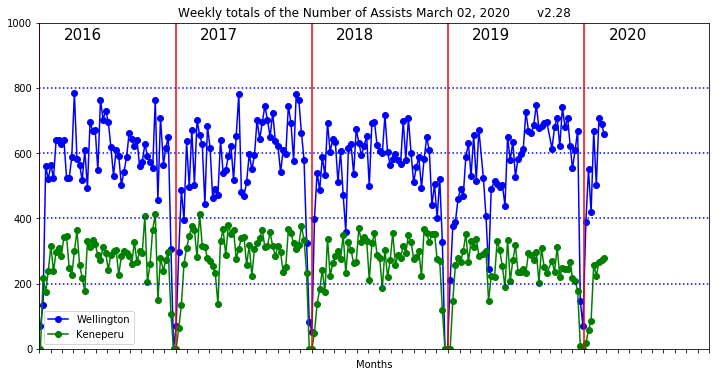

In [5]:
if __name__ == '__main__':
    print('STRTED')
    main()

In [6]:
# 